# **Ερώτημα 1: Gradient Descent**

Παρακάτω δίνονται όλες οι βιβλιοθήκες που χρειάζονται για το ερώτημα 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Ερώτημα 1.1


Γενική υλοποίηση του Gradient Descent.

Παραμέτροι:
- loss: συνάρτηση κόστους
- grad: συνάρτηση που υπολογίζει την κλίση (gradient)
- w_init: αρχικό διάνυσμα παραμέτρων
- x, y: δεδομένα εκπαίδευσης
- learning_rate: ρυθμός εκμάθησης η
- T: αριθμός επαναλήψεων


In [ ]:
def gradient_descent(loss, grad, w_init, x, y, learning_rate, T, verbose=False):
    w = w_init.copy()  # Αρχικοποίηση των παραμέτρων
    loss_history = []  # Ιστορικό της συνάρτησης κόστους

    for t in range(T):
        gradient = grad(w, x, y)  # Υπολογισμός της κλίσης
        w -= learning_rate * gradient  # Ενημέρωση των παραμέτρων
        loss_history.append(loss(w, x, y))  # Αποθήκευση της τιμής κόστους

        if verbose and t % 10 == 0:
            print(f"Βήμα {t}: Loss = {loss(w, x, y)}")

    return w, loss_history

### 1ος Χώρος Υπόθεσης

Θεωρήστε τον χώρο υποθέσεων που αποτελείται από τις ακόλουθες πραγματικές συναρτήσεις $f_1:\mathbb{R}\to\mathbb{R}$ με δύο παραμέτρους $w=[w_0, w_1]^\intercal\in\mathbb{R}^2$ :

$$
	f_1(x;w) = \frac{1}{1+e^{-(w_0+w_1x)}}
$$

Επιπλέον, τη συνάρτηση κόστους $L_1:\mathbb{R}^2\to\mathbb{R}$ η οποία δίνεται ως :

$$
	L_1(w) = -\frac{1}{n} \sum_{i=1}^n \Big( y_i \log_2 f_1(x_i;w) + (1-y_i) \log_2\big( 1 - f_1(x_i;w) \big)	\Big)
$$
όπου με $\{ (x_i,y_i ) \}_{i=1}^n$ συμβολίζονται τα δεδομένα εκπαίδευσης.

Η παράγωγος της συνάρτησης κόστους $L_1$ ως προς το διάνυσμα παραμέτρων $w = [w_0, w_1]^T $ δίνεται αναλυτικά ως:

$$
\nabla_w L_1(w) =
\begin{bmatrix}
\frac{\partial L_1}{\partial w_0} \\
\frac{\partial L_1}{\partial w_1}
\end{bmatrix}
= \frac{1}{n} \sum_{i=1}^n \left( f_1(x_i; w) - y_i \right)
\begin{bmatrix}
1 \\
x_i
\end{bmatrix}
$$

Παρακάτω δίνονται οι συναρτήσεις σε python

In [ ]:
def f1(x):
    return 1 / (1 + np.exp(-x))

# Συνάρτηση κόστους L1(w)
def loss_L1(w, x, y):
    z = w[0] + w[1] * x
    f = f1(z)
    return -np.mean(y * np.log2(f) + (1 - y) * np.log2(1 - f))

# Gradient της L1(w)
def grad_L1(w, x, y):
    z = w[0] + w[1] * x
    f = f1(z)
    error = f - y
    dw0 = np.mean(error) # παράγωγος ως προς w0
    dw1 = np.mean(error * x) # παράγωγος ως προς w1
    return np.array([dw0, dw1])

Παρακάτω δίνονται τα δεδομένα εκπαίδευσης από το hw1_data.ipynd

In [ ]:
data1 = np.array([[ 10.63415642, -10.31804897,  -3.91323692,  13.47455445,
         12.00245098,   7.01459213, -11.5083141 ,   7.83875   ,
        -11.21021617,   6.95282804,   7.79101979,  13.94835343,
          3.01243432,  11.67679791,  13.41197807,  14.61995534,
         -8.70743264, -14.10312612, -11.68244994,  14.75202699,
          9.25316629,  -4.82661632,  -6.99915042,   6.49562369,
        -11.46126563,  -9.38897405,  -3.68953244,  -5.95603391,
        -10.80285714, -11.78004227],
       [  1.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])
data1

array([[ 10.63415642, -10.31804897,  -3.91323692,  13.47455445,
         12.00245098,   7.01459213, -11.5083141 ,   7.83875   ,
        -11.21021617,   6.95282804,   7.79101979,  13.94835343,
          3.01243432,  11.67679791,  13.41197807,  14.61995534,
         -8.70743264, -14.10312612, -11.68244994,  14.75202699,
          9.25316629,  -4.82661632,  -6.99915042,   6.49562369,
        -11.46126563,  -9.38897405,  -3.68953244,  -5.95603391,
        -10.80285714, -11.78004227],
       [  1.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

Αρχικοποιούμε τις παραμέτρους της συνάρτησης gradient_descent(loss, grad, w_init, x, y, learning_rate, T, verbose=False) με βάση τα δεδομένα της εκφώνησης και εκτελούμε τον αλγόριθμο.

In [ ]:
w_init = np.array([0.0, 1.0])
learning_rate = 1e-3
T = 150
x = data1[0, :]
y = data1[1, :]

In [ ]:
w_final, loss_history = gradient_descent(loss_L1, grad_L1, w_init, x, y, learning_rate, T)
w_final

array([-2.26085057e-05,  1.00200053e+00])

Γράφημα που να απεικονίζει την τιμή της συνάρτησης κόστους (κάθετος άξονας)
ως συνάρτηση των επαναλήψεων (οριζόντιος άξονας)

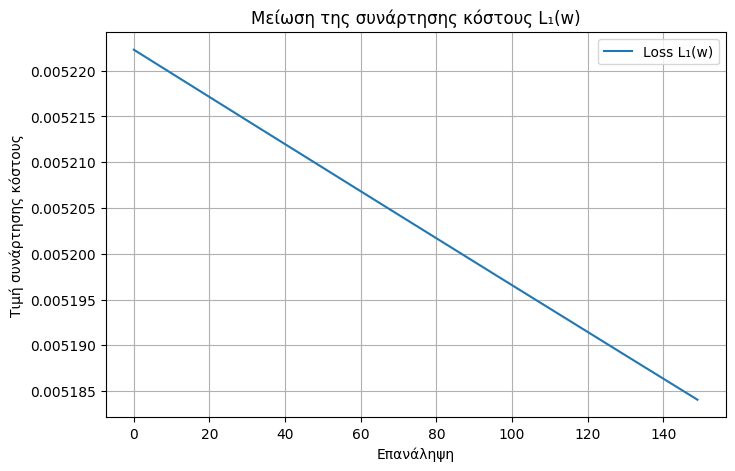

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Loss L₁(w)")
plt.xlabel("Επανάληψη")
plt.ylabel("Τιμή συνάρτησης κόστους")
plt.title("Μείωση της συνάρτησης κόστους L₁(w)")
plt.grid(True)
plt.legend()
plt.show()

Γράφημα στο οποίο απεικονίζονται τα δεδομένα εκπαίδευσης (ως
σημεία) και το γράφημα του μοντέλου για την τελική εκτίμηση των τιμών των
παραμέτρων

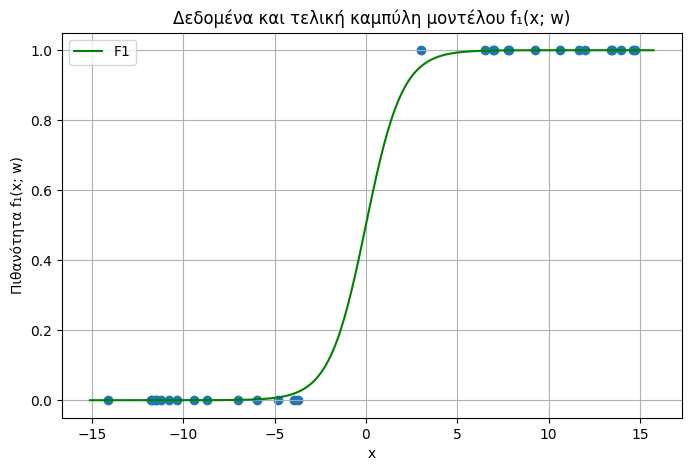

In [ ]:
# Καμπύλη μοντέλου (λεπτά x)
x_curve = np.linspace(min(x) - 1, max(x) + 1, 300)
z = w_final[0] + w_final[1] * x_curve
y_curve = f1(z)

# Διάγραμμα
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.plot(x_curve, y_curve, color='green', label='F1')
plt.xlabel("x")
plt.ylabel("Πιθανότητα f₁(x; w)")
plt.title("Δεδομένα και τελική καμπύλη μοντέλου f₁(x; w)")
plt.legend()
plt.grid(True)
plt.show()

### 2ος Χώρος Υπόθεσης

Θεωρήστε τον χώρο υποθέσεων που αποτελείται από τις ακόλουθες πραγματικές συναρτήσεις $f_2:\mathbb{R}\to\mathbb{R}$ με τέσσερις παραμέτρους $w=[w_0, w_1, w_2, w_3]^\intercal\in\mathbb{R}^4$ :

$$
	f_2(x;w) = w_0 + w_1 \sigma(w_2+w_3x)
$$
όπου η $\sigma:\mathbb{R}\to\mathbb{R}$ δίνεται ως
$$
	\sigma(x)=\begin{cases} x, & x>0 \\ 0, & x\le 0 \end{cases}
$$


Επιπλέον, τη συνάρτηση κόστους $L_2:\mathbb{R}^4\to\mathbb{R}$ η οποία δίνεται ως :

$$
	L_2(w) = \frac{1}{n} \sum_{i=1}^n \big( y_i - f_1(x_i;w) \big)^2
$$

**Σημείωση:** Παρατηρήστε ότι η $\sigma$ δεν είναι παραγωγίσιμη στο $\mathbf{x}=0$, καθώς τα πλευρικά όρια δε συμπίπτουν. Ωστόσο, θεωρούμε ότι η παράγωγος της δίνεται ως

$$
	\frac{d\sigma(\mathbf{x})}{dx} = \begin{cases} 1, & x>0 \\ 0, & x\le 0 \end{cases}
$$

Η παράγωγος της $ L_2(w) $ ως προς το διάνυσμα $ w = [w_0, w_1, w_2, w_3]^T $ είναι:

$$
\nabla_w L_2(w) =
\frac{2}{n} \sum_{i=1}^n e_i \cdot
\begin{bmatrix}
1 \\
\sigma_i \\
w_1 \cdot \sigma_i (1 - \sigma_i) \\
w_1 \cdot \sigma_i (1 - \sigma_i) \cdot x_i
\end{bmatrix}
$$

Παρακάτω δίνονται οι συναρτήσεις σε python

In [ ]:
# Συναρτήσεις ενεργοποίησης και παραγώγου
def sigma(z):
    return np.where(z > 0, z, 0)

def d_sigma(z):
    return np.where(z > 0, 1, 0)

# Μοντέλο f_2
def f2(w, x):
    z = w[2] + w[3] * x
    return w[0] + w[1] * sigma(z)

# Συνάρτηση κόστους L_2
def loss_L2(w, x, y):
    preds = f2(w, x)
    return np.mean((y - preds) ** 2)

# Gradient της L_2
def grad_L2(w, x, y):
    z = w[2] + w[3] * x
    sigma_z = sigma(z)
    d_sigma_z = d_sigma(z)
    preds = f2(w, x)
    error = preds - y

    grad = np.zeros_like(w)
    grad[0] = 2 * np.mean(error)
    grad[1] = 2 * np.mean(error * sigma_z)
    grad[2] = 2 * np.mean(error * w[1] * d_sigma_z)
    grad[3] = 2 * np.mean(error * w[1] * d_sigma_z * x)
    return grad

Παρακάτω δύνονται τα δεδομένα εκπαίδευσης από το hw1_data.ipynd

In [ ]:
data2 = np.array([[-6.63823962e-01,  1.76259595e+00, -3.99908500e+00,
        -1.58133942e+00, -2.82595287e+00, -3.26129124e+00,
        -2.50991831e+00, -1.23551418e+00, -8.25860206e-01,
         3.10533872e-01, -6.46443885e-01,  1.48175600e+00,
        -2.36438200e+00,  3.02493949e+00, -3.78089925e+00,
         1.36374008e+00, -6.61561581e-01,  4.69518628e-01,
        -2.87690449e+00, -2.41518809e+00,  2.40595655e+00,
         3.74609261e+00, -1.49260657e+00,  1.53858093e+00,
         3.01111322e+00,  3.15685331e+00, -3.31964631e+00,
        -3.68756173e+00, -2.64135664e+00,  3.02514003e+00],
       [-7.76859909e-02,  6.84885863e+00,  2.11068734e-02,
         2.91407607e-01, -5.50309589e-01,  5.72361855e-01,
         4.50795360e-01,  2.51247169e-01,  4.50427975e-01,
         2.58973769e+00, -7.76767080e-04,  5.97738329e+00,
        -1.33944040e-01,  1.13399962e+01, -3.45830376e-01,
         5.89284348e+00, -3.28271093e-01,  2.98595306e+00,
        -3.35623065e-01, -6.33229946e-03,  8.65921447e+00,
         1.33554857e+01,  8.29901089e-01,  6.98676486e+00,
         1.09374219e+01,  1.10267454e+01, -3.73579147e-01,
         8.46227301e-01,  2.54038774e-02,  1.07569223e+01]])
data2

array([[-6.63823962e-01,  1.76259595e+00, -3.99908500e+00,
        -1.58133942e+00, -2.82595287e+00, -3.26129124e+00,
        -2.50991831e+00, -1.23551418e+00, -8.25860206e-01,
         3.10533872e-01, -6.46443885e-01,  1.48175600e+00,
        -2.36438200e+00,  3.02493949e+00, -3.78089925e+00,
         1.36374008e+00, -6.61561581e-01,  4.69518628e-01,
        -2.87690449e+00, -2.41518809e+00,  2.40595655e+00,
         3.74609261e+00, -1.49260657e+00,  1.53858093e+00,
         3.01111322e+00,  3.15685331e+00, -3.31964631e+00,
        -3.68756173e+00, -2.64135664e+00,  3.02514003e+00],
       [-7.76859909e-02,  6.84885863e+00,  2.11068734e-02,
         2.91407607e-01, -5.50309589e-01,  5.72361855e-01,
         4.50795360e-01,  2.51247169e-01,  4.50427975e-01,
         2.58973769e+00, -7.76767080e-04,  5.97738329e+00,
        -1.33944040e-01,  1.13399962e+01, -3.45830376e-01,
         5.89284348e+00, -3.28271093e-01,  2.98595306e+00,
        -3.35623065e-01, -6.33229946e-03,  8.65921447e+

Αρχικοποιούμε τις παραμέτρους της συνάρτησης gradient_descent(loss, grad, w_init, x, y, learning_rate, T, verbose=False) με βάση τα δεδομένα της εκφώνησης και εκτελούμε τον αλγόριθμο.

In [ ]:
w2_init = np.array([0.5, 1.0, 2.2, 3.4])
T = 150
learning_rate = 1e-3

x2 = data2[0, :]
y2 = data2[1, :]

In [ ]:
w2_final, loss2_history = gradient_descent(loss_L2, grad_L2, w2_init, x2, y2, learning_rate, T,)
w2_final

array([0.40776643, 0.84027772, 2.1732661 , 3.37369889])

Γράφημα που να απεικονίζει την τιμή της συνάρτησης κόστους (κάθετος άξονας) ως συνάρτηση των επαναλήψεων (οριζόντιος άξονας)

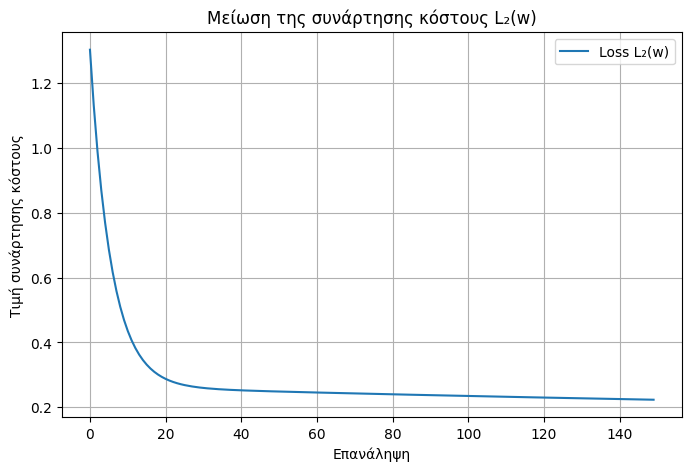

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(loss2_history, label="Loss L₂(w)")
plt.xlabel("Επανάληψη")
plt.ylabel("Τιμή συνάρτησης κόστους")
plt.title("Μείωση της συνάρτησης κόστους L₂(w)")
plt.grid(True)
plt.legend()
plt.show()

Γράφημα στο οποίο απεικονίζονται τα δεδομένα εκπαίδευσης (ως σημεία) και το γράφημα του μοντέλου για την τελική εκτίμηση των τιμών των παραμέτρων

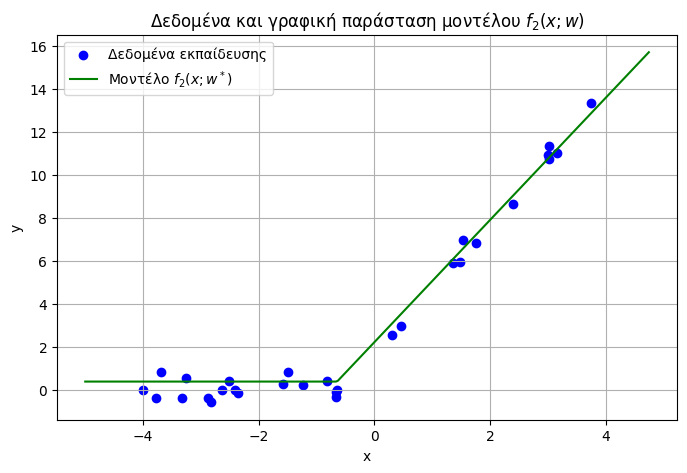

In [ ]:
def f2_final(x):
    z = w2_final[2] + w2_final[3] * x
    return w2_final[0] + w2_final[1] * sigma(z)

# Δημιουργία πυκνού πίνακα x για καμπύλη
x_range = np.linspace(min(x2) - 1, max(x2) + 1, 300)
y_curve = f2_final(x_range)

# Διάγραμμα
plt.figure(figsize=(8, 5))
plt.scatter(x2, y2, color='blue', label="Δεδομένα εκπαίδευσης")
plt.plot(x_range, y_curve, color='green', label="Μοντέλο $f_2(x; w^*)$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Δεδομένα και γραφική παράσταση μοντέλου $f_2(x; w)$")
plt.legend()
plt.grid(True)
plt.show()

### Σχολιασμός

Ο αλγόριθμος Gradient Descent φαίνεται να λειτουργεί ικανοποιητικά και για τους δύο χώρους υπόθεσης, βρίσκοντας παραμέτρους που ελαχιστοποιούν τις αντίστοιχες συναρτήσεις κόστους. Η επιλογή του χώρου υπόθεσης και της συνάρτησης κόστους επηρεάζει την απόδοση του μοντέλου. Στο συγκεκριμένο πρόβλημα, ο 1ος χώρος υπόθεσης (f1, L1) φαίνεται να δίνει καλύτερα αποτελέσματα.

Αν ο learning rate ρυθμιστεί στην τιμή $10^{-4}$ χρειαζεται περισσότερος χρόνος (περισσότερες επαναλήψεις) για να φτάσει σε ένα ελάχιστο της συνάρτησης κόστους. Βέβαια η απόκλιση των τιμών είναι πολύ μιρκή.

## Ερώτημα 1.2

### Υποερώτημα 1

In [ ]:
def gradient_descent_piecewise(f_loss, grad_loss, w_init, x, y, T, verbose=False):
    w = w_init.copy()

    for t in range(T):
        # Ορισμός learning rate ανά φάση
        if t < T // 3:
            learning_rate = 1e-3
        elif t < 2 * T // 3:
            learning_rate = 1e-4
        else:
            learning_rate = 1e-5

        grad = grad_loss(w, x, y)
        w -= learning_rate * grad
        loss = f_loss(w, x, y)

        if verbose and t % 10 == 0:
            print(f"Βήμα {t}, LR={learning_rate:.1e}: Loss = {loss:.6f}")

    return w

In [ ]:
w1_piecewise = gradient_descent_piecewise(loss_L1, grad_L1, w_init, x, y, T)
w1_piecewise

array([-8.43729788e-06,  1.00074205e+00])

In [ ]:
w2_piecewise = gradient_descent_piecewise(loss_L2, grad_L2, w2_init, x2, y2, T)
w2_piecewise

array([0.45430966, 0.83770166, 2.1802035 , 3.36857821])

### Υποερώτημα 2

In [ ]:
def gradient_descent_exponential(f_loss, grad_loss, w_init, x, y, T, learning_rate_start=1e-3, decay=0.9, verbose=False):
    w = w_init.copy()
    learning_rate = learning_rate_start

    for t in range(T):
        grad = grad_loss(w, x, y)
        w -= learning_rate * grad
        loss = f_loss(w, x, y)

        if verbose and t % 10 == 0:
            print(f"Βήμα {t}, LR={learning_rate:.2e}: Loss = {loss:.6f}")

        learning_rate *= decay

    return w

In [ ]:
w1_exp = gradient_descent_exponential(loss_L1, grad_L1, w_init, x, y, T)
w1_exp

array([-1.52648472e-06,  1.00013386e+00])

In [ ]:
w2_exp = gradient_descent_exponential(loss_L2, grad_L2, w2_init, x2, y2, T)
w2_exp

array([0.48531598, 0.90414523, 2.19029978, 3.37926545])

### Σχολιασμός

Οι δύο μέθοδοι με μεταβαλλόμενο learning rate, piecewise και exponential, προσφέρουν βελτιώσεις στην σταθερότητα και στην ικανότητα εύρεσης καλύτερων λύσεων σε σχέση με τον Gradient Descent με σταθερό learning rate. Η piecewise μέθοδος αλλάζει τον learning rate σταδιακά σε τρεις φάσεις, επιτρέποντας στον αλγόριθμο να εξερευνήσει τον χώρο αναζήτησης αρχικά και στη συνέχεια να εστιάσει σε ένα ελάχιστο. Η exponential μέθοδος μειώνει τον learning rate ομαλά και εκθετικά, προσφέροντας πιο σταδιακή και ομαλή σύγκλιση.

# **Ερώτημα 2: Face recognition**

Παρακάτω δίνονται όλες οι βιβλιοθήκες που χρειάζονται για το ερώτημα 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Αυτός ο κώδικας περιμένει ένα αρχείο zip με το όνομα "faces.zip" να ανέβει στο Google Colab. Θα αποσυμπιέσει το αρχείο στον τρέχοντα κατάλογο και θα επιβεβαιώσει ότι τα αρχεία έχουν εξαχθεί σωστά.

In [ ]:
from google.colab import files
import zipfile
import os

# Ανεβάστε το αρχείο zip (μόνο μία φορά)
uploaded = files.upload()

# Αποσυμπίεση του αρχείου
with zipfile.ZipFile('faces.zip', 'r') as zip_ref:
    zip_ref.extractall('faces')

# Επιβεβαίωση ότι τα αρχεία υπάρχουν
print(os.listdir('faces'))

TypeError: 'NoneType' object is not subscriptable

## Ερώτημα 1

In [ ]:
def loadimages(path, set_number, preprocess=True):
    images = []
    labels = []

    # Ορισμός εύρους αρχείων ανάλογα με το set
    if set_number == "Set_1":
        file_range = range(1, 8)
    elif set_number == "Set_2":
        file_range = range(8, 20)
    elif set_number == "Set_3":
        file_range = range(20, 32)
    elif set_number == "Set_4":
        file_range = range(32, 46)
    elif set_number == "Set_5":
        file_range = range(46, 65)
    else:
        raise ValueError("Invalid set number")

    # Διάβασμα εικόνων
    for person_id in range(1, 11):  # Υπάρχουν 10 άτομα
        for img_num in file_range:
            filename = f"person0{person_id}_{img_num:02d}.png"
            filepath = os.path.join(path, filename)

            if os.path.exists(filepath):
                img = Image.open(filepath)
                img_array = np.array(img).flatten()  # Μετατροπή σε διάνυσμα
                images.append(img_array)
                labels.append(person_id)

    images = np.array(images).T  # Πίνακας δεδομένων (features × samples)
    labels = np.array(labels)

    return np.array(images), np.array(labels)  # Επιστροφή πίνακα δεδομένων (features x samples) και labels

## Ερώτηση 2

In [ ]:
# Φόρτωση δεδομένων
path_to_images = "/content/faces/faces"  # Αλλάξτε το path αν χρειάζεται
# Φόρτωση και προεπεξεργασία δεδομένων
X_train, y_train = loadimages(path_to_images, "Set_1")

# Προεπεξεργασία: Κεντράρισμα δεδομένων
mean_face = np.mean(X_train, axis=1)
X_train_centered = X_train - mean_face[:, np.newaxis]

# PCA με 30 συνιστώσες
pca = PCA(n_components=30)
projected = pca.fit(X_train_centered.T)   # Η PCA του sklearn περιμένει samples x features

# Eigenfaces
eigenfaces = pca.components_.T  # Μεταφορά για να έχουμε features x components

In [ ]:
X_train.shape

(2500, 63)

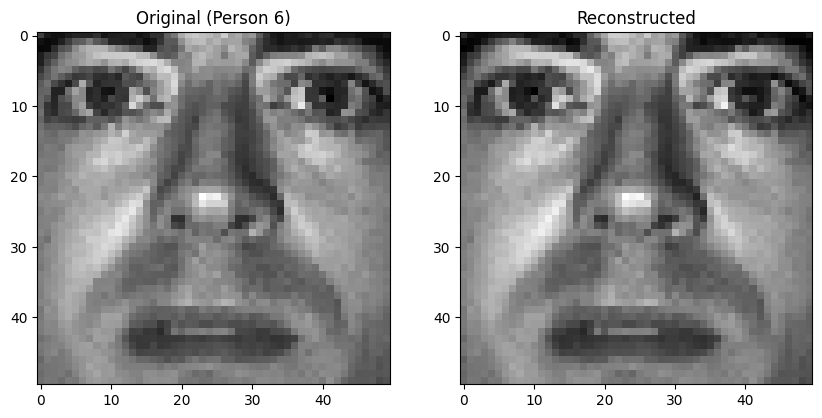

In [ ]:
# Επιλογή τυχαίας εικόνας
random_idx = np.random.randint(0, X_train.shape[1])
original_img = X_train[:, random_idx]
label = y_train[random_idx]

# Προβολή στον χώρο PCA
projected = pca.transform((original_img - mean_face).reshape(1, -1))

# Ανακατασκευή
reconstructed = pca.inverse_transform(projected) + mean_face

# Απεικόνιση
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title(f"Original (Person {label})")
plt.imshow(original_img.reshape(50, 50), cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Reconstructed")
plt.imshow(reconstructed.reshape(50, 50), cmap='gray')
plt.show()

Παρατήρηση: Η ανακατασκευασμένη εικόνα διατηρεί τις κύριες πληροφορίες του προσώπου αλλά χάνει κάποιες λεπτομέρειες. Αυτό οφείλεται στη χρήση μόνο 30 κύριων συνιστωσών αντί όλων των 2500.

## Ερώτημα 3

Στη συνάρτηση που χρησιμοποιώ με αφήνει να έχω μόνο n_components == min(n_samples, n_features). Οπότε θα κοιτάξω τιμές μεταξύ 2 και 63

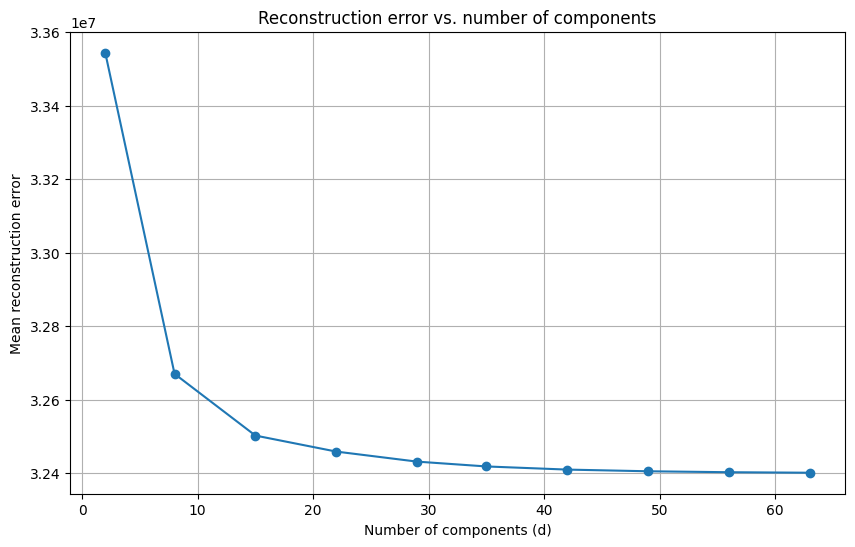

In [ ]:
d_values = np.linspace(2, min(X_train.shape[0], X_train.shape[1]), 10, dtype=int)  # Ορίζουμε τιμές για το d από 2 έως το ελάχιστο μεταξύ του αριθμού χαρακτηριστικών και δειγμάτων
errors = []

for d in d_values:
    pca = PCA(n_components=d) # Αρχικοποιούμε το PCA με d συνιστώσες
    pca.fit(X_train.T)  # Εκπαιδεύουμε το PCA στα δεδομένα εκπαίδευσης (μεταφορά για samples x features)

    # Ανακατασκευή εικόνων
    projected = pca.transform(X_train.T)  # Προβολή των δεδομένων στον χώρο PCA
    reconstructed = pca.inverse_transform(projected) + mean_face  # Ανακατασκευή των δεδομένων

    # Υπολογισμός σφάλματος
    error = np.mean(np.linalg.norm(X_train - reconstructed.T, axis=0)**2)  # Μέσο τετραγωνικό σφάλμα ανακατασκευής
    errors.append(error)

# Διάγραμμα σφάλματος
plt.figure(figsize=(10, 6))
plt.plot(d_values, errors, 'o-')
plt.xlabel('Αριθμός συνιστωσών (d)')
plt.ylabel('Μέσο σφάλμα ανακατασκευής')
plt.title('Σφάλμα ανακατασκευής ως προς τον αριθμό συνιστωσών')
plt.grid()
plt.show()

Παρατήρηση: Το σφάλμα μειώνεται όσο αυξάνεται ο αριθμός των συνιστωσών, με την πιο απότομη πτώση να παρατηρείται στις πρώτες 10 συνιστώσες. Μετά από αυτό το σημείο, η μείωση του σφάλματος γίνεται πιο αργή.

## Ερώτημα 4

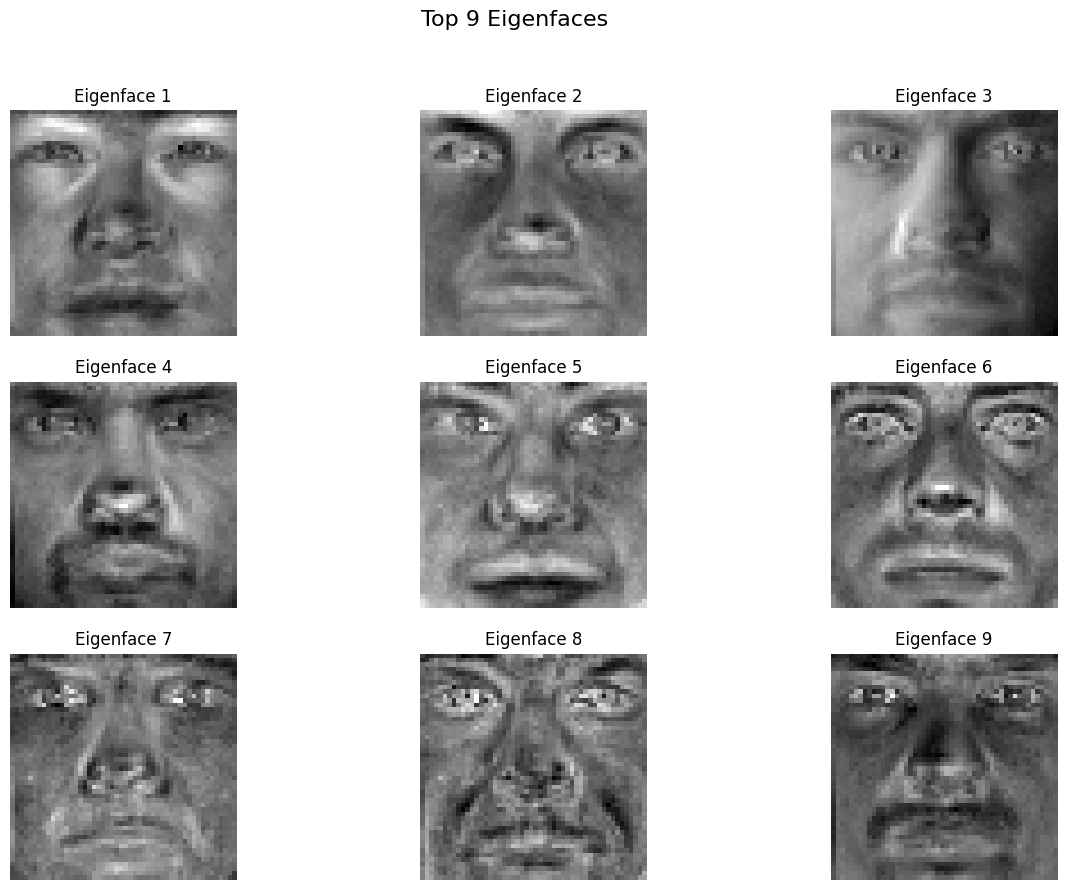

In [ ]:
# Απεικόνιση
plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    eigenface = eigenfaces[:, i].reshape(50, 50)
    plt.imshow(eigenface, cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.suptitle('Top 9 Eigenfaces', fontsize=16)
plt.show()

Παρατήρηση: Τα πρώτα ιδιοδιανύσματα αντιπροσωπεύουν τις πιο σημαντικές κατευθύνσεις διακύμανσης στα δεδομένα. Τα πρώτα eigenfaces φαίνεται να κωδικοποιούν γενικά χαρακτηριστικά φωτισμού και σχήματος προσώπου, ενώ τα επόμενα προσθέτουν πιο λεπτομερείς πληροφορίες.

## Ερώτημα 5

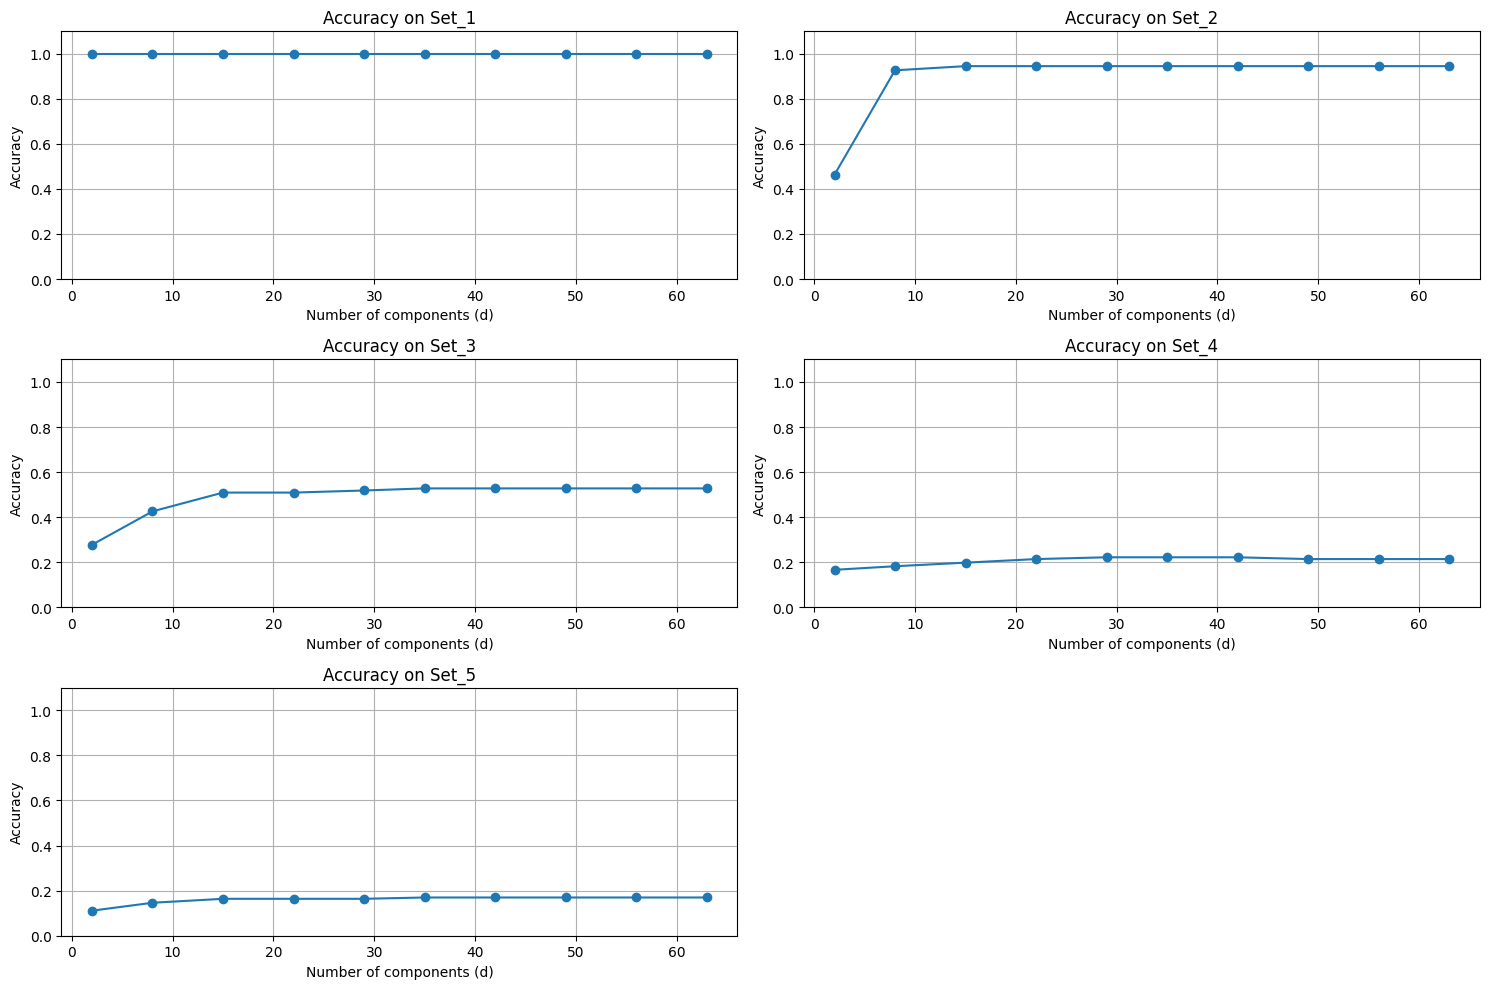

In [ ]:
# Φόρτωση όλων των συνόλων
sets = ["Set_1", "Set_2", "Set_3", "Set_4", "Set_5"]
all_data = {set_name: loadimages(path_to_images, set_name) for set_name in sets}

# Εκπαίδευση και αξιολόγηση για διαφορετικά d
d_values = np.linspace(2, min(X_train.shape[0], X_train.shape[1]), 10, dtype=int)
accuracies = {set_name: [] for set_name in sets}

for d in d_values:
    # Εκπαίδευση PCA στο Set_1
    pca = PCA(n_components=d)
    pca.fit(X_train_centered.T)

    # Μετασχηματισμός Set_1 (training)
    X_train_pca = pca.transform(X_train_centered.T)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_pca, y_train)

    # Αξιολόγηση σε όλα τα sets
    for set_name in sets:
        X_test, y_test = all_data[set_name]
        X_test_centered = X_test - mean_face[:, np.newaxis]
        X_test_pca = pca.transform(X_test_centered.T)
        y_pred = knn.predict(X_test_pca)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[set_name].append(accuracy)

# Διαγράμματα απόδοσης
plt.figure(figsize=(15, 10))
for i, set_name in enumerate(sets):
    plt.subplot(3, 2, i+1)
    plt.plot(d_values, accuracies[set_name], 'o-')
    plt.title(f'Accuracy on {set_name}')
    plt.xlabel('Number of components (d)')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1.1])
    plt.grid()
plt.tight_layout()
plt.show()

 Για ποιο d έχουμε την καλύτερη απόδοση στο Set_2; Πώς αλλάζει στα υπόλοιπα sets;

    Στο Set_2 η καλύτερη απόδοση παρατηρείται γύρω στις 10-60 συνιστώσες.

    Η απόδοση στα Set_3, Set_4 και Set_5 είναι γενικά χαμηλότερη, ειδικά για μεγάλα d, λόγω των διαφορετικών συνθηκών φωτισμού που δεν υπήρχαν στο training set. Αλλά γενικά σε όλα τα σετ η καλύτερη απόδοση παρατηρείται γύρω στις 10 - 60 συνιστώσες.

b. Ποιο d έχει την σταθερότερη απόδοση στα διαφορετικά sets;

    Περίπου 20-60 συνιστώσες δίνουν μια ισορροπημένη απόδοση σε όλα τα sets.

c. Ποιο d θα επιλέγατε για το μοντέλο σας;

    Θα επιλέγαμε d=50, καθώς προσφέρει καλή απόδοση στο Set_2 και σχετικά σταθερή απόδοση στα υπόλοιπα sets.

## Ερώτημα 6

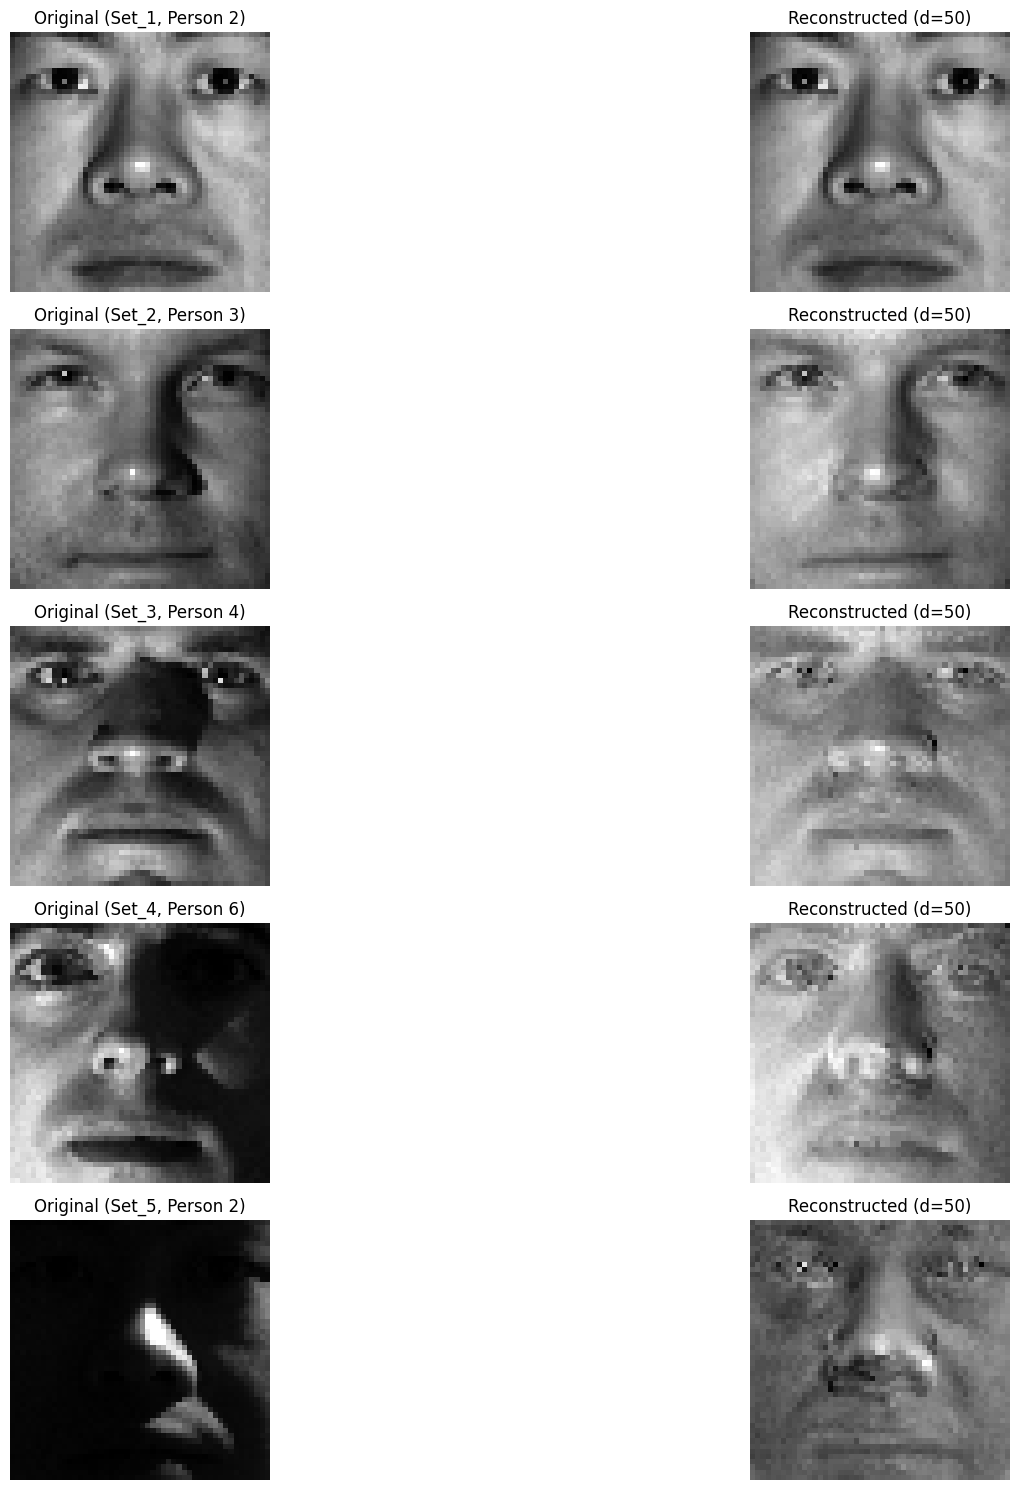

In [ ]:
# PCA με την επιλεγμένη τιμή d=50
pca = PCA(n_components=50)
pca.fit(X_train_centered.T)

plt.figure(figsize=(20, 15))
for i, set_name in enumerate(sets):
    X_set, y_set = all_data[set_name]
    random_idx = np.random.randint(0, X_set.shape[1])
    original = X_set[:, random_idx]
    label = y_set[random_idx]

    # Ανακατασκευή
    projected = pca.transform((original - mean_face).reshape(1, -1))
    reconstructed = pca.inverse_transform(projected) + mean_face

    # Απεικόνιση
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(original.reshape(50, 50), cmap='gray')
    plt.title(f'Original ({set_name}, Person {label})')
    plt.axis('off')

    plt.subplot(5, 2, 2*i+2)
    plt.imshow(reconstructed.reshape(50, 50), cmap='gray')
    plt.title(f'Reconstructed (d=50)')
    plt.axis('off')
plt.tight_layout()
plt.show()

Παρατήρηση: Η ποιότητα της ανακατασκευής μειώνεται στα sets με πιο ακραίες συνθήκες φωτισμού (Set_4, Set_5). Αυτό οφείλεται στο ότι αυτές οι συνθήκες δεν ήταν καλά αντιπροσωπευμένες στο training set (Set_1).

## Ερώτημα 7

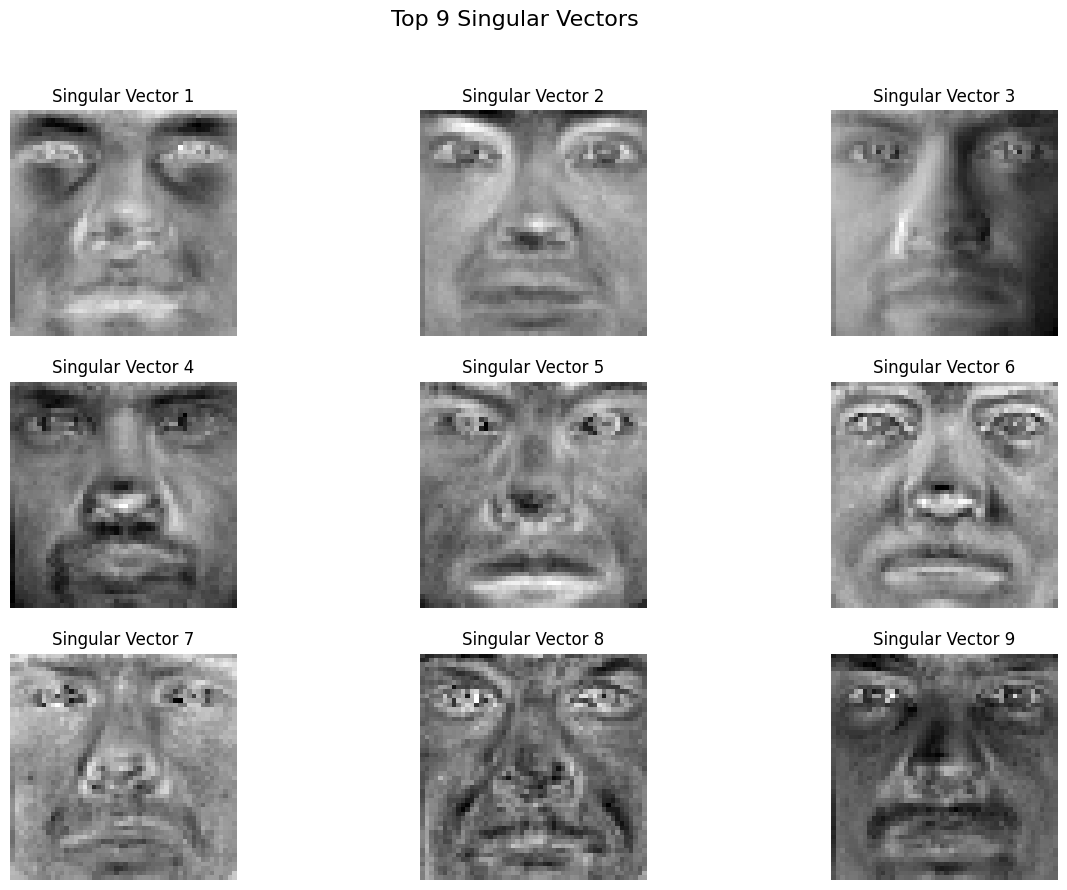

In [ ]:
# Υπολογισμός SVD
U, s, Vt = np.linalg.svd(X_train_centered, full_matrices=False)

# Απεικόνιση των πρώτων 9 singular vectors
plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    sv = U[:, i].reshape(50, 50)
    plt.imshow(sv, cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.axis('off')
plt.suptitle('Top 9 Singular Vectors', fontsize=16)
plt.show()

Παρατήρηση: Τα singular vectors από το SVD είναι πολύ παρόμοια με τα ιδιοδιανύσματα από την PCA. Αυτό οφείλεται στο ότι η PCA μπορεί να υλοποιηθεί μέσω SVD του κεντραρισμένου πίνακα δεδομένων. Οι μικρές διαφορές μπορεί να οφείλονται σε διαφορές στην υλοποίηση ή στην προεπεξεργασία.